In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_excel('Data.xlsx', sheetname=None)

In [31]:
df['1000V']

,x(cm),positive y(tic),negative y(tic),uncertainty +/- (tic),offset (tic),tic length (m),current (A),current uncertainty (A),voltage (V),voltage uncertainty (V)
0,2,0.625,-1.00,0.25,-0.25,0.002,0.31,0.01,1000,1
1,4,1.875,-2.50,0.25,-0.25,NaN,NaN,NaN,NaN,NaN
2,6,4.000,-4.50,0.25,-0.25,NaN,NaN,NaN,NaN,NaN
3,8,6.500,-7.25,0.25,-0.25,NaN,NaN,NaN,NaN,NaN
4,10,10.000,-10.50,0.50,0.00,NaN,NaN,NaN,NaN,NaN


In [71]:
xpoints = np.array([df[key]['x(cm)'] for key in df]) #Same x points at all voltages

#Convert x (cm) to meters
xpoints = xpoints*1e-2

y_uncertainty = np.array(df['1000V']['uncertainty +/- (tic)']) #Eyeball measurement
i_uncertainty = df['1000V']['current uncertainty (A)'][0]
v_uncertainty = df['1000V']['voltage uncertainty (V)'][0]


offsets = np.array([df[key]['offset (tic)'] for key in df]) #At V=0, the beam wasn't quite through y = 0.
#Convert ticks to meters
offsets = offsets*tic_length



tic_length = df['1000V']['tic length (m)'][0] #Length of ticks on paper

In [72]:
y_up = np.array([df[key]['positive y(tic)'] for key in df]) #Upward deflection in ticks.
y_down = np.array([df[key]['negative y(tic)'] for key in df])#Downward

#Convert ticks to meters
y_up = y_up*tic_length
y_down = y_down*tic_length

#Correct for offset
y_up = y_up - offsets
y_down = y_down - offsets

#Average to account for alignment
ypoints = (1/2)*(y_up + abs(y_down))

currents = np.array([df[key]['current (A)'][0] for key in df]) #Amps
voltages = np.array([df[key]['voltage (V)'][0] for key in df]) #Voltes

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


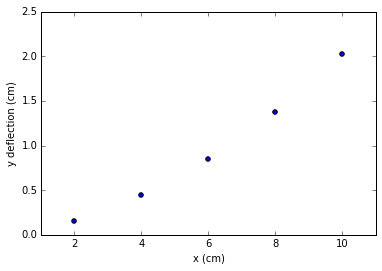

In [76]:
plt.scatter(xpoints[1]*100,ypoints[1]*100);
plt.xlabel('x (cm)');
plt.ylabel('y deflection (cm)');